In [23]:
import torch
from torch import nn, optim
import numpy as np
from matplotlib import pyplot as plt

In [24]:
# 線形回帰ネットワークのclassをnn.Moduleの継承で定義
class LinearRegression(nn.Module):
    # コンストラクタ(インスタンス生成時の初期化)
    def __init__(self, in_features, out_features, bias=False):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features, bias=bias)
    
    # メソッド(ネットワークをシーケンシャルに定義)
    def forward(self, x):
        y = self.linear(x)
        return y

In [25]:
# トレーニング関数
def train(model, optimizer, E, iteration, x, y):
    # 学習ループ
    losses = []
    for i in range(iteration):
        optimizer.zero_grad()                   # 勾配情報を0に初期化
        y_pred = model(x)                       # 予測
        loss = E(y_pred.reshape(y.shape), y)    # 損失を計算(shapeを揃える)
        loss.backward()                         # 勾配の計算
        optimizer.step()                        # 勾配の更新
        losses.append(loss.item())              # 損失値の蓄積
        print('epoch=', i+1, 'loss=', loss)
    return model, losses

epoch= 1 loss= tensor(377.9245, grad_fn=<MseLossBackward0>)
epoch= 2 loss= tensor(74.9872, grad_fn=<MseLossBackward0>)
epoch= 3 loss= tensor(34.9381, grad_fn=<MseLossBackward0>)
epoch= 4 loss= tensor(29.4102, grad_fn=<MseLossBackward0>)
epoch= 5 loss= tensor(28.4178, grad_fn=<MseLossBackward0>)
epoch= 6 loss= tensor(28.0239, grad_fn=<MseLossBackward0>)
epoch= 7 loss= tensor(27.7114, grad_fn=<MseLossBackward0>)
epoch= 8 loss= tensor(27.4124, grad_fn=<MseLossBackward0>)
epoch= 9 loss= tensor(27.1180, grad_fn=<MseLossBackward0>)
epoch= 10 loss= tensor(26.8270, grad_fn=<MseLossBackward0>)
epoch= 11 loss= tensor(26.5391, grad_fn=<MseLossBackward0>)
epoch= 12 loss= tensor(26.2543, grad_fn=<MseLossBackward0>)
epoch= 13 loss= tensor(25.9727, grad_fn=<MseLossBackward0>)
epoch= 14 loss= tensor(25.6940, grad_fn=<MseLossBackward0>)
epoch= 15 loss= tensor(25.4184, grad_fn=<MseLossBackward0>)
epoch= 16 loss= tensor(25.1458, grad_fn=<MseLossBackward0>)
epoch= 17 loss= tensor(24.8761, grad_fn=<MseLoss

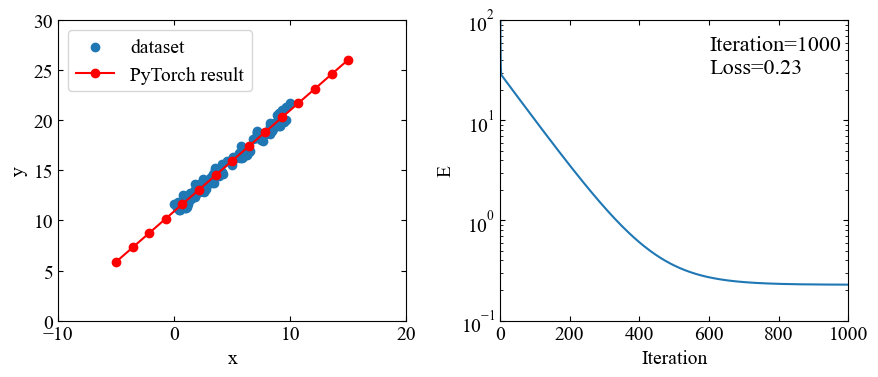

In [26]:
import torch
from torch import nn, optim
import numpy as np
from matplotlib import pyplot as plt

# 線形回帰ネットワークのclassをnn.Moduleの継承で定義
class LinearRegression(nn.Module):
    # コンストラクタ(インスタンス生成時の初期化)
    def __init__(self, in_features, out_features, bias=False):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features, bias=bias)

    # メソッド(ネットワークをシーケンシャルに定義)
    def forward(self, x):
        y = self.linear(x)
        return y

# トレーニング関数
def train(model, optimizer, E, iteration, x, y):
    # 学習ループ
    losses = []
    for i in range(iteration):
        optimizer.zero_grad()                   # 勾配情報を0に初期化
        y_pred = model(x)                       # 予測
        loss = E(y_pred.reshape(y.shape), y)    # 損失を計算(shapeを揃える)
        loss.backward()                         # 勾配の計算
        optimizer.step()                        # 勾配の更新
        losses.append(loss.item())              # 損失値の蓄積
        print('epoch=', i+1, 'loss=', loss)
    return model, losses

# テスト関数
def test(model, x):
    y_pred = model(x).data.numpy().T[0]  # 予測
    return y_pred


# グラフ描画関数
def plot(x, y, x_new, y_pred, losses):
    # ここからグラフ描画-------------------------------------------------
    # フォントの種類とサイズを設定する。
    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] = 'Times New Roman'

    # 目盛を内側にする。
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    # グラフの上下左右に目盛線を付ける。
    fig = plt.figure(figsize=(9, 4))
    ax1 = fig.add_subplot(121)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = fig.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')

    # 軸のラベルを設定する。
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('E')

    # スケール設定
    ax1.set_xlim(-10, 20)
    ax1.set_ylim(0, 30)
    ax2.set_xlim(0, 1000)
    ax2.set_ylim(0.1, 100)
    ax2.set_yscale('log')

    # データプロット
    ax1.scatter(x, y, label='dataset')
    ax1.plot(x_new, y_pred, color='red', label='PyTorch result', marker="o")
    ax2.plot(np.arange(0, len(losses), 1), losses)
    ax2.text(600, 30, 'Loss=' + str(round(losses[len(losses)-1], 2)), fontsize=16)
    ax2.text(600, 50, 'Iteration=' + str(round(len(losses), 1)), fontsize=16)

    # グラフを表示する。
    ax1.legend()
    fig.tight_layout()
    plt.show()
    plt.close()
    # -------------------------------------------------------------------

# トレーニングデータ
x = np.random.uniform(0, 10, 100)                                   # x軸をランダムで作成
y = np.random.uniform(0.2, 1.9, 100) + x + 10                       # yを分散した線形データとして作成
x = torch.from_numpy(x.astype(np.float32)).float()                  # xをテンソルに変換
y = torch.from_numpy(y.astype(np.float32)).float()                  # yをテンソルに変換
X = torch.stack([torch.ones(100), x], 1)                            # xに切片用の定数1配列を結合

# テストデータ
x_test = np.linspace(-5, 15, 15)                                    # x軸を作成
x_test = torch.from_numpy(x_test.astype(np.float32)).float()        # xをテンソルに変換
X_test = torch.stack([torch.ones(15), x_test], 1)                   # xに切片用の定数1配列を結合

# ネットワークのインスタンスを生成
net = LinearRegression(in_features=2, out_features=1)

# 最適化アルゴリズムと損失関数を設定
optimizer = optim.SGD(net.parameters(), lr=0.01)                    # 最適化にSGDを設定
E = nn.MSELoss()                                                    # 損失関数にMSEを設定

# トレーニング
net, losses = train(model=net, optimizer=optimizer, E=E, iteration=1000, x=X, y=y)

# テスト
y_pred = test(net, X_test)

# グラフ描画
plot(x, y, X_test.data.numpy().T[1], y_pred, losses)

In [27]:
# 線形回帰ネットワークのclassをnn.Moduleの継承で定義
class Regression(nn.Module):
    # コンストラクタ(インスタンス生成時の初期化)
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, 1)

    # メソッド(ネットワークをシーケンシャルに定義)
    def forward(self, x):
        x = nn.functional.relu(self.linear1(x))
        x = nn.functional.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [28]:
# トレーニングデータ
x = np.random.uniform(0, 10, 100)                                   # x軸をランダムで作成
y = np.random.uniform(0.9, 1.1, 100) * np.sin(2 * np.pi * 0.1 * x)  # 正弦波を作成
x = torch.from_numpy(x.astype(np.float32)).float()                  # xをテンソルに変換
y = torch.from_numpy(y.astype(np.float32)).float()                  # yをテンソルに変換
X = torch.stack([torch.ones(100), x], 1)                            # xに切片用の定数1配列を結合

epoch= 1 loss= tensor(1.0989, grad_fn=<MseLossBackward0>)
epoch= 2 loss= tensor(1.1563, grad_fn=<MseLossBackward0>)
epoch= 3 loss= tensor(3.4123, grad_fn=<MseLossBackward0>)
epoch= 4 loss= tensor(0.5520, grad_fn=<MseLossBackward0>)
epoch= 5 loss= tensor(0.4800, grad_fn=<MseLossBackward0>)
epoch= 6 loss= tensor(0.3860, grad_fn=<MseLossBackward0>)
epoch= 7 loss= tensor(0.2884, grad_fn=<MseLossBackward0>)
epoch= 8 loss= tensor(0.2030, grad_fn=<MseLossBackward0>)
epoch= 9 loss= tensor(0.1381, grad_fn=<MseLossBackward0>)
epoch= 10 loss= tensor(0.1110, grad_fn=<MseLossBackward0>)
epoch= 11 loss= tensor(0.1049, grad_fn=<MseLossBackward0>)
epoch= 12 loss= tensor(0.1116, grad_fn=<MseLossBackward0>)
epoch= 13 loss= tensor(0.1971, grad_fn=<MseLossBackward0>)
epoch= 14 loss= tensor(0.2227, grad_fn=<MseLossBackward0>)
epoch= 15 loss= tensor(0.1264, grad_fn=<MseLossBackward0>)
epoch= 16 loss= tensor(0.1023, grad_fn=<MseLossBackward0>)
epoch= 17 loss= tensor(0.0953, grad_fn=<MseLossBackward0>)
epoch=

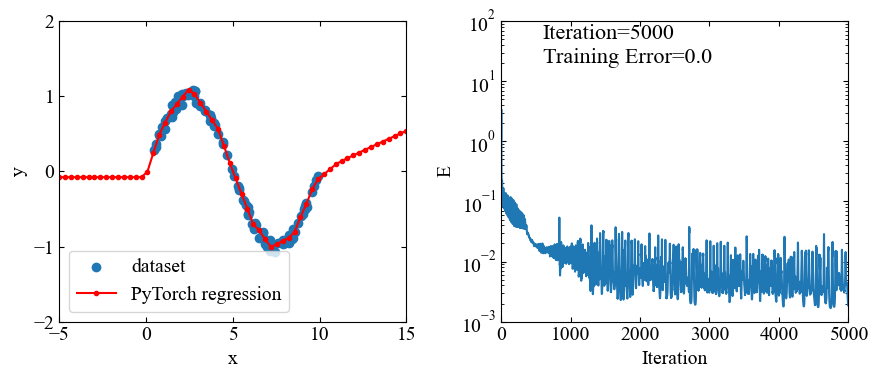

In [29]:
import torch
from torch import nn, optim
import numpy as np
from matplotlib import pyplot as plt

# 線形回帰ネットワークのclassをnn.Moduleの継承で定義
class Regression(nn.Module):
    # コンストラクタ(インスタンス生成時の初期化)
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, 1)

    # メソッド(ネットワークをシーケンシャルに定義)
    def forward(self, x):
        x = nn.functional.relu(self.linear1(x))
        x = nn.functional.relu(self.linear2(x))
        x = self.linear3(x)
        return x

# トレーニング関数
def train(model, optimizer, E, iteration, x, y):
    # 学習ループ
    losses = []
    for i in range(iteration):
        optimizer.zero_grad()                   # 勾配情報を0に初期化
        y_pred = model(x)                       # 予測
        loss = E(y_pred.reshape(y.shape), y)    # 損失を計算(shapeを揃える)
        loss.backward()                         # 勾配の計算
        optimizer.step()                        # 勾配の更新
        losses.append(loss.item())              # 損失値の蓄積
        print('epoch=', i+1, 'loss=', loss)
    return model, losses

def test(model, x):
    y_pred = model(x).data.numpy().T[0]  # 予測
    return y_pred

# グラフ描画関数
def plot(x, y, x_new, y_pred, losses):
    # ここからグラフ描画-------------------------------------------------
    # フォントの種類とサイズを設定する。
    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] = 'Times New Roman'

    # 目盛を内側にする。
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    # グラフの上下左右に目盛線を付ける。
    fig = plt.figure(figsize=(9, 4))
    ax1 = fig.add_subplot(121)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = fig.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')

    # 軸のラベルを設定する。
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('E')

    # スケール設定
    ax1.set_xlim(-5, 15)
    ax1.set_ylim(-2, 2)
    ax2.set_xlim(0, 5000)
    ax2.set_ylim(0.001, 100)
    ax2.set_yscale('log')

    # データプロット
    ax1.scatter(x, y, label='dataset')
    ax1.plot(x_new, y_pred, color='red', label='PyTorch regression', marker="o", markersize=3)
    ax2.plot(np.arange(0, len(losses), 1), losses)
    ax2.text(600, 20, 'Training Error=' + str(round(losses[len(losses)-1], 2)), fontsize=16)
    ax2.text(600, 50, 'Iteration=' + str(round(len(losses), 1)), fontsize=16)

    # グラフを表示する。
    ax1.legend()
    fig.tight_layout()
    plt.show()
    plt.close()
    # -------------------------------------------------------------------

# トレーニングデータ
x = np.random.uniform(0, 10, 100)                                   # x軸をランダムで作成
y = np.random.uniform(0.9, 1.1, 100) * np.sin(2 * np.pi * 0.1 * x)  # 正弦波を作成
x = torch.from_numpy(x.astype(np.float32)).float()                  # xをテンソルに変換
y = torch.from_numpy(y.astype(np.float32)).float()                  # yをテンソルに変換
X = torch.stack([torch.ones(100), x], 1)                            # xに切片用の定数1配列を結合

# テストデータ
x_test = np.linspace(-5, 15, 60)                                    # x軸を作成
x_test = torch.from_numpy(x_test.astype(np.float32)).float()        # xをテンソルに変換
X_test = torch.stack([torch.ones(60), x_test], 1)                   # xに切片用の定数1配列を結合

# ネットワークのインスタンスを生成
net = Regression()

# 最適化アルゴリズムと損失関数を設定
optimizer = optim.RMSprop(net.parameters(), lr=0.01)                # 最適化にRMSpropを設定
E = nn.MSELoss()                                                    # 損失関数にMSEを設定

# トレーニング
net, losses = train(model=net, optimizer=optimizer, E=E, iteration=5000, x=X, y=y)

# テスト
y_pred = test(net, X_test)

# グラフ描画
plot(x, y, X_test.data.numpy().T[1], y_pred, losses)

In [30]:
import torch
from torch import nn, optim
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os
import glob

# GIFアニメーションを作成
def create_gif(in_dir, out_filename):
    path_list = sorted(glob.glob(os.path.join(*[in_dir, '*'])))  # ファイルパスをソートしてリストする
    imgs = []  # 画像をappendするための空配列を定義

    # ファイルのフルパスからファイル名と拡張子を抽出
    for i in range(len(path_list)):
        img = Image.open(path_list[i])  # 画像ファイルを1つずつ開く
        imgs.append(img)  # 画像をappendで配列に格納していく

    # appendした画像配列をGIFにする。durationで持続時間、loopでループ数を指定可能。
    imgs[0].save(out_filename,
                 save_all=True, append_images=imgs[1:], optimize=False, duration=100, loop=0)

# 線形回帰ネットワークのclassをnn.Moduleの継承で定義
class LinearRegression(nn.Module):
    # コンストラクタ(インスタンス生成時の初期化)
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, 1)

    # メソッド(ネットワークをシーケンシャルに定義)
    def forward(self, x):
        x = nn.functional.relu(self.linear1(x))
        x = nn.functional.relu(self.linear2(x))
        x = self.linear3(x)
        return x

# トレーニング関数
def train(model, optimizer, E, iteration, x, y, X_test, x_plot):
    # 学習ループ
    losses = []
    for i in range(iteration):
        optimizer.zero_grad()                   # 勾配情報を0に初期化
        y_pred = model(x)                       # 予測
        loss = E(y_pred.reshape(y.shape), y)    # 損失を計算(shapeを揃える)
        loss.backward()                         # 勾配の計算
        optimizer.step()                        # 勾配の更新
        losses.append(loss.item())              # 損失値の蓄積
        print('epoch=', i+1, 'loss=', loss)

        # 50計算毎にプロットを保存
        if (i + 1) % 50 == 0:
            # グラフ描画
            y_test = test(model, X_test)
            plot(x_plot, y.data.numpy(), X_test.data.numpy().T[1], y_test, losses, 'out', i+1)

    return model, losses

def test(model, x):
    y_pred = model(x).data.numpy().T[0]  # 予測
    return y_pred


# グラフ描画関数
def plot(x, y, x_new, y_pred, losses, dir, index):
    # ここからグラフ描画-------------------------------------------------
    # フォントの種類とサイズを設定する。
    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] = 'Times New Roman'

    # 目盛を内側にする。
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    # グラフの上下左右に目盛線を付ける。
    fig = plt.figure(figsize=(9, 4))
    ax1 = fig.add_subplot(121)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = fig.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')

    # 軸のラベルを設定する。
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('E')

    # スケール設定
    ax1.set_xlim(-5, 15)
    ax1.set_ylim(-2, 2)
    ax2.set_xlim(0, 5000)
    ax2.set_ylim(0.001, 100)
    ax2.set_yscale('log')

    # データプロット
    ax1.scatter(x, y, label='dataset')
    ax1.plot(x_new, y_pred, color='red', label='PyTorch regression', marker="o", markersize=3)
    ax2.plot(np.arange(0, len(losses), 1), losses)
    ax2.scatter(len(losses), losses[len(losses) - 1], color='red')
    ax2.text(600, 20, 'Training Error=' + str(round(losses[len(losses)-1], 2)), fontsize=16)
    ax2.text(600, 50, 'Iteration=' + str(round(len(losses), 1)), fontsize=16)

    # グラフを表示する。
    ax1.legend(bbox_to_anchor=(0, 1), loc='upper left')
    fig.tight_layout()

    # dirフォルダが無い時に新規作成
    if os.path.exists(dir):
        pass
    else:
        os.mkdir(dir)

    # 画像保存パスを準備
    path = os.path.join(*[dir, str("{:05}".format(index)) + '.png'])

    # 画像を保存する
    plt.savefig(path)

    # plt.show()
    plt.close()
    # -------------------------------------------------------------------

# トレーニングデータ
x = np.random.uniform(0, 10, 100)                                   # x軸をランダムで作成
y = np.random.uniform(0.9, 1.1, 100) * np.sin(2 * np.pi * 0.1 * x)  # 正弦波を作成
x = torch.from_numpy(x.astype(np.float32)).float()                  # xをテンソルに変換
y = torch.from_numpy(y.astype(np.float32)).float()                  # yをテンソルに変換
X = torch.stack([torch.ones(100), x], 1)                            # xに切片用の定数1配列を結合

# テストデータ
x_test = np.linspace(-5, 15, 60)                                    # x軸を作成
x_test = torch.from_numpy(x_test.astype(np.float32)).float()        # xをテンソルに変換
X_test = torch.stack([torch.ones(60), x_test], 1)                   # xに切片用の定数1配列を結合

# ネットワークのインスタンスを生成
net = LinearRegression()

# 最適化アルゴリズムと損失関数を設定
optimizer = optim.RMSprop(net.parameters(), lr=0.01)                # 最適化にRMSpropを設定
E = nn.MSELoss()                                                    # 損失関数にMSEを設定

# トレーニング
net, losses = train(model=net, optimizer=optimizer, E=E, iteration=5000, x=X, y=y,
                    X_test=X_test, x_plot=x)

# テスト
y_pred = test(net, X_test)

# グラフ描画
#plot(x, y, X_test.data.numpy().T[1], y_pred, losses, 'out2', 0)

# GIFアニメーションを作成する関数を実行する
create_gif(in_dir='out', out_filename='pytorch-sinewave-regression.gif')

epoch= 1 loss= tensor(0.7252, grad_fn=<MseLossBackward0>)
epoch= 2 loss= tensor(4.2278, grad_fn=<MseLossBackward0>)
epoch= 3 loss= tensor(2.3543, grad_fn=<MseLossBackward0>)
epoch= 4 loss= tensor(0.5191, grad_fn=<MseLossBackward0>)
epoch= 5 loss= tensor(0.3808, grad_fn=<MseLossBackward0>)
epoch= 6 loss= tensor(0.2758, grad_fn=<MseLossBackward0>)
epoch= 7 loss= tensor(0.2213, grad_fn=<MseLossBackward0>)
epoch= 8 loss= tensor(0.2365, grad_fn=<MseLossBackward0>)
epoch= 9 loss= tensor(0.2314, grad_fn=<MseLossBackward0>)
epoch= 10 loss= tensor(0.1555, grad_fn=<MseLossBackward0>)
epoch= 11 loss= tensor(0.1385, grad_fn=<MseLossBackward0>)
epoch= 12 loss= tensor(0.1257, grad_fn=<MseLossBackward0>)
epoch= 13 loss= tensor(0.1183, grad_fn=<MseLossBackward0>)
epoch= 14 loss= tensor(0.1099, grad_fn=<MseLossBackward0>)
epoch= 15 loss= tensor(0.1054, grad_fn=<MseLossBackward0>)
epoch= 16 loss= tensor(0.0959, grad_fn=<MseLossBackward0>)
epoch= 17 loss= tensor(0.0951, grad_fn=<MseLossBackward0>)
epoch=

In [31]:
# トレーニングデータ
x = np.random.uniform(-5, 15, 100)                                  # x軸をランダムで作成
y = np.random.uniform(0.9, 1.1, 100) * np.sin(2 * np.pi * 0.1 * x)  # 正弦波を作成
x = torch.from_numpy(x.astype(np.float32)).float()                  # xをテンソルに変換
y = torch.from_numpy(y.astype(np.float32)).float()                  # yをテンソルに変換
X = torch.stack([torch.ones(100), x], 1)                            # xに切片用の定数1配列を結合

In [32]:
# トレーニングデータ
x = np.random.uniform(0, 10, 500)                                   # x軸をランダムで作成
y = np.random.uniform(0.5, 1.5, 500) * np.exp(x)                    # 指数関数を作成
x = torch.from_numpy(x.astype(np.float32)).float()                  # xをテンソルに変換
y = torch.from_numpy(y.astype(np.float32)).float()                  # yをテンソルに変換
X = torch.stack([torch.ones(500), x], 1)                            # xに切片用の定数1配列を結合

In [33]:
# トレーニングデータ
x = np.random.uniform(-5, 15, 100)                                  # x軸をランダムで作成
y = np.random.uniform(0.9, 1.1, 100) * np.tanh(x)                   # tanh関数を作成
x = torch.from_numpy(x.astype(np.float32)).float()                  # xをテンソルに変換
y = torch.from_numpy(y.astype(np.float32)).float()                  # yをテンソルに変換
X = torch.stack([torch.ones(100), x], 1)                            # xに切片用の定数1配列を結合

In [34]:
# トレーニングデータ
x1 = np.random.uniform(0, 10, 30)                                     # ノイズを含んだx軸を作成
x2 = np.random.uniform(0, 10, 30)                                     # ノイズを含んだy軸を作成
grid_x, grid_y = np.meshgrid(x1, x2)                                  # Gridデータを作成
z = np.sin(grid_x.ravel()) * np.cos(grid_y.ravel())                   # ノイズを含んだ平面点列データを作成

grid_x = torch.from_numpy(grid_x.ravel().astype(np.float32)).float()  # grid_xをテンソルに変換
grid_y = torch.from_numpy(grid_y.ravel().astype(np.float32)).float()  # grid_yをテンソルに変換
z = torch.from_numpy(z.astype(np.float32)).float()                    # zをテンソルに変換
X = torch.stack([torch.ones(len(grid_x)), grid_x, grid_y], 1)  # xに切片用の定数1配列を結合

In [35]:
import torch
from torch import nn, optim
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os
import glob

# GIFアニメーションを作成
def create_gif(in_dir, out_filename):
    path_list = sorted(glob.glob(os.path.join(*[in_dir, '*'])))  # ファイルパスをソートしてリストする
    imgs = []  # 画像をappendするための空配列を定義

    # ファイルのフルパスからファイル名と拡張子を抽出
    for i in range(len(path_list)):
        img = Image.open(path_list[i])  # 画像ファイルを1つずつ開く
        imgs.append(img)  # 画像をappendで配列に格納していく

    # appendした画像配列をGIFにする。durationで持続時間、loopでループ数を指定可能。
    imgs[0].save(out_filename,
                 save_all=True, append_images=imgs[1:], optimize=False, duration=100, loop=0)

# 線形回帰ネットワークのclassをnn.Moduleの継承で定義
class Regression(nn.Module):
    # コンストラクタ(インスタンス生成時の初期化)
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(3, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, 1)

    # メソッド(ネットワークをシーケンシャルに定義)
    def forward(self, x):
        x = nn.functional.relu(self.linear1(x))
        x = nn.functional.relu(self.linear2(x))
        x = self.linear3(x)
        return x

# トレーニング関数
def train(model, optimizer, E, iteration, x, y):
    # 学習ループ
    losses = []
    for i in range(iteration):
        optimizer.zero_grad()                   # 勾配情報を0に初期化
        y_pred = model(x)                       # 予測
        loss = E(y_pred.reshape(y.shape), y)    # 損失を計算(shapeを揃える)
        loss.backward()                         # 勾配の計算
        optimizer.step()                        # 勾配の更新
        losses.append(loss.item())              # 損失値の蓄積
        print('epoch=', i+1, 'loss=', loss)

        #グラフ描画
        X1 = np.arange(0, 11, 0.5)                                                # x軸を作成
        X2 = np.arange(0, 11, 0.5)                                                # y軸を作成
        X, Y = np.meshgrid(X1, X2)                                                # x軸とy軸からグリッドデータを作成

        X2 = torch.from_numpy(X.ravel().astype(np.float32)).float()  # xをテンソルに変換
        Y2 = torch.from_numpy(Y.ravel().astype(np.float32)).float() # xをテンソルに変換
        Input = torch.stack([torch.ones(len(X.ravel())), X2, Y2], 1)  # xに切片用の定数1配列を結合

        # 50計算毎にプロットを保存
        if (i + 1) % 50 == 0:
            Z = test(model, Input).reshape(X.shape)
            plot_3d(x.T[1], x.T[2], y, X, Y, Z, losses, 'out', i+1)
    return model, losses

def test(model, x):
    y_pred = model(x).data.numpy()  # 予測
    return y_pred

# グラフ描画関数
def plot_3d(x1, x2, z, X, Y, Z, losses, dir, index):
    # ここからグラフ描画-------------------------------------------------
    # フォントの種類とサイズを設定する。
    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] = 'Times New Roman'

    # 目盛を内側にする。
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    # グラフの上下左右に目盛線を付ける。
    fig = plt.figure(figsize=(9, 4))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = fig.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')

    # 軸のラベルを設定する。
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('y')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('E')

    # スケール設定
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    ax1.set_zlim(-2, 2)
    ax2.set_xlim(0, 5000)
    ax2.set_ylim(0.001, 10)
    ax2.set_yscale('log')

    # データプロット
    ax1.scatter3D(x1, x2, z, label='dataset')
    ax1.plot_wireframe(X, Y, Z, color='red', label='PyTorch result')
    ax2.plot(np.arange(0, len(losses), 1), losses)
    ax2.scatter(len(losses), losses[len(losses) - 1], color='red')
    ax2.text(600, 0.3, 'Loss=' + str(round(losses[len(losses)-1], 2)), fontsize=16)
    ax2.text(600, 0.5, 'Iteration=' + str(round(len(losses), 1)), fontsize=16)

    # グラフを表示する。
    ax1.legend(bbox_to_anchor=(0, 1), loc='upper left')
    fig.tight_layout()

    # dirフォルダが無い時に新規作成
    if os.path.exists(dir):
        pass
    else:
        os.mkdir(dir)

    # 画像保存パスを準備
    path = os.path.join(*[dir, str("{:05}".format(index)) + '.png'])

    # 画像を保存する
    plt.savefig(path)

    # plt.show()
    plt.close()


    # -------------------------------------------------------------------

# トレーニングデータ
x1 = np.random.uniform(0, 10, 30)                                     # ノイズを含んだx軸を作成
x2 = np.random.uniform(0, 10, 30)                                     # ノイズを含んだy軸を作成
grid_x, grid_y = np.meshgrid(x1, x2)                                  # Gridデータを作成
z = np.sin(grid_x.ravel()) * np.cos(grid_y.ravel())                   # ノイズを含んだ平面点列データを作成

grid_x = torch.from_numpy(grid_x.ravel().astype(np.float32)).float()  # grid_xをテンソルに変換
grid_y = torch.from_numpy(grid_y.ravel().astype(np.float32)).float()  # grid_yをテンソルに変換
z = torch.from_numpy(z.astype(np.float32)).float()                    # yをテンソルに変換
X = torch.stack([torch.ones(len(grid_x)), grid_x, grid_y], 1)  # xに切片用の定数1配列を結合

# ネットワークのインスタンスを生成
net = Regression()

# 最適化アルゴリズムと損失関数を設定
optimizer = optim.RMSprop(net.parameters(), lr=0.01)                # 最適化にRMSpropを設定
E = nn.MSELoss()                                                    # 損失関数にMSEを設定

# トレーニング
net, losses = train(model=net, optimizer=optimizer, E=E, iteration=5000, x=X, y=z)

# GIFアニメーションを作成する関数を実行する
create_gif(in_dir='out', out_filename='pytorch-2d-sincos-regression.gif')

epoch= 1 loss= tensor(0.1428, grad_fn=<MseLossBackward0>)
epoch= 2 loss= tensor(11.2704, grad_fn=<MseLossBackward0>)
epoch= 3 loss= tensor(7.4635, grad_fn=<MseLossBackward0>)
epoch= 4 loss= tensor(0.1925, grad_fn=<MseLossBackward0>)
epoch= 5 loss= tensor(0.1771, grad_fn=<MseLossBackward0>)
epoch= 6 loss= tensor(0.1682, grad_fn=<MseLossBackward0>)
epoch= 7 loss= tensor(0.1623, grad_fn=<MseLossBackward0>)
epoch= 8 loss= tensor(0.1582, grad_fn=<MseLossBackward0>)
epoch= 9 loss= tensor(0.1550, grad_fn=<MseLossBackward0>)
epoch= 10 loss= tensor(0.1523, grad_fn=<MseLossBackward0>)
epoch= 11 loss= tensor(0.1501, grad_fn=<MseLossBackward0>)
epoch= 12 loss= tensor(0.1482, grad_fn=<MseLossBackward0>)
epoch= 13 loss= tensor(0.1465, grad_fn=<MseLossBackward0>)
epoch= 14 loss= tensor(0.1449, grad_fn=<MseLossBackward0>)
epoch= 15 loss= tensor(0.1436, grad_fn=<MseLossBackward0>)
epoch= 16 loss= tensor(0.1424, grad_fn=<MseLossBackward0>)
epoch= 17 loss= tensor(0.1414, grad_fn=<MseLossBackward0>)
epoch